In [68]:
# ========================== #
# 1. IMPORT LIBRARY
# ========================== #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE



In [69]:
# ========================== #
# 2. LOAD & CLEAN DATA
# ========================== #
df = pd.read_csv("Student Stress Factors.csv")
df.head()  # Tampilkan data awal

df.drop("Timestamp", axis=1, inplace=True)
df.head()

df.columns = [
    'Sleep_Quality', 'Headaches_per_week', 'Academic_Performance',
    'Study_Load', 'Extracurricular_per_week', 'Stress_Level'
]

df['Stress_Label'] = df['Stress_Level'].apply(lambda x: 0 if x <= 2 else 1)
df.drop('Stress_Level', axis=1, inplace=True)
df.head()

,Sleep_Quality,Headaches_per_week,Academic_Performance,Study_Load,Extracurricular_per_week,Stress_Label
0,3,1,3,4,2,1
1,4,1,2,3,3,0
2,2,1,2,1,4,1
3,3,2,3,2,3,1
4,2,3,1,5,5,1


In [70]:
# ========================== #
# 3. FEATURE ENGINEERING
# ========================== #
df['Load_Activity_Ratio'] = df['Study_Load'] / (df['Extracurricular_per_week'] + 1)
df.head()

# Kalau belajar terus, tidur kurang, sering sakit kepala, dan jarang refreshing, kemungkinan besar akan stres.

,Sleep_Quality,Headaches_per_week,Academic_Performance,Study_Load,Extracurricular_per_week,Stress_Label,Load_Activity_Ratio
0,3,1,3,4,2,1,1.333333
1,4,1,2,3,3,0,0.750000
2,2,1,2,1,4,1,0.200000
3,3,2,3,2,3,1,0.500000
4,2,3,1,5,5,1,0.833333


In [71]:
# ========================== #
# 4. SCALING & SMOTE
# ========================== #
X = df.drop('Stress_Label', axis=1)
y = df['Stress_Label']

X

y


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

=== Random Forest ===
Accuracy: 0.75
Confusion Matrix:
 [[3 2]
 [1 6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.75      0.86      0.80         7

    accuracy                           0.75        12
   macro avg       0.75      0.73      0.73        12
weighted avg       0.75      0.75      0.74        12



C:\Users\Rouli Elizabeth\AppData\Local\Temp\ipykernel_33172\4093194690.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='mako')


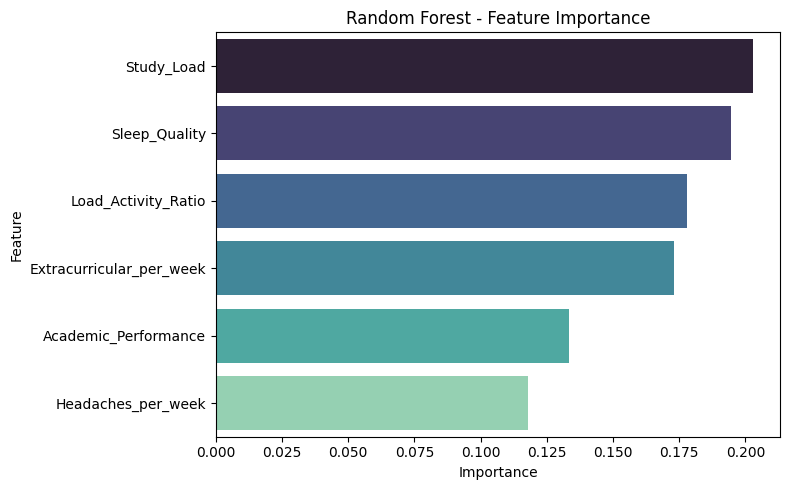

In [72]:
# ========================== #
# 5. MODEL TRAINING
# ========================== #
# ========================== #
# Random Forest
# ========================== #
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
print("=== Random Forest ===")
print("Accuracy:", rf_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

# ========================== #
# 5.a FEATURE IMPORTANCE
# ========================== #
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='mako')
plt.title("Random Forest - Feature Importance")
plt.tight_layout()
plt.show()



In [73]:
# ========================== #
# Logistic Regression
# ========================== #
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_acc = accuracy_score(y_test, lr_pred)
print("=== Logistic Regression ===")
print("Accuracy:", lr_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print("Classification Report:\n", classification_report(y_test, lr_pred))

=== Logistic Regression ===
Accuracy: 0.5833333333333334
Confusion Matrix:
 [[2 3]
 [2 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.62      0.71      0.67         7

    accuracy                           0.58        12
   macro avg       0.56      0.56      0.56        12
weighted avg       0.57      0.58      0.57        12



In [74]:
# ========================== #
# K-Nearest Neighbors
# ========================== #
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

knn_acc = accuracy_score(y_test, knn_pred)
print("=== K-Nearest Neighbors ===")
print("Accuracy:", knn_acc)
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("Classification Report:\n", classification_report(y_test, knn_pred))


=== K-Nearest Neighbors ===
Accuracy: 0.6666666666666666
Confusion Matrix:
 [[2 3]
 [1 6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.67      0.86      0.75         7

    accuracy                           0.67        12
   macro avg       0.67      0.63      0.62        12
weighted avg       0.67      0.67      0.65        12



C:\Users\Rouli Elizabeth\AppData\Local\Temp\ipykernel_33172\1542572543.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="Accuracy", palette="viridis")


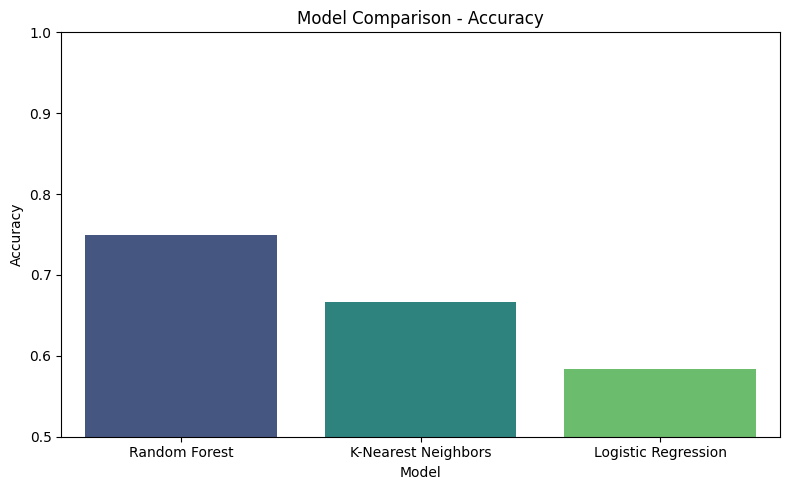

In [75]:
# ========================== #
# 6. COMPARE RESULTS
# ========================== #
results = [
    {"Model": "Random Forest", "Accuracy": rf_acc},
    {"Model": "Logistic Regression", "Accuracy": lr_acc},
    {"Model": "K-Nearest Neighbors", "Accuracy": knn_acc},
]

results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x="Model", y="Accuracy", palette="viridis")
plt.title("Model Comparison - Accuracy")
plt.ylim(0.5, 1.0)
plt.tight_layout()
plt.show()

In [76]:
models = {
    "Random Forest": rf_model,
    "Logistic Regression": lr_model,
    "K-Nearest Neighbors": knn_model
}

In [77]:
# ========================== #
# 7. CROSS VALIDATION
# ========================== #
print("\n=== Cross-Validation Scores ===")
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)
    print(f"{name}: mean={scores.mean():.4f}, std={scores.std():.4f}")

# Bandingin model mana yang paling bagus secara rata-rata.
# Pilih model yang konsisten, bukan cuma bagus 1x doang.


=== Cross-Validation Scores ===
Random Forest: mean=0.6236, std=0.1028
Logistic Regression: mean=0.5891, std=0.1153
K-Nearest Neighbors: mean=0.5855, std=0.1544


=== Macro F1-Score ===
Random Forest: 0.7333333333333334
Logistic Regression: 0.5555555555555556
K-Nearest Neighbors: 0.625


C:\Users\Rouli Elizabeth\AppData\Local\Temp\ipykernel_33172\940041680.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=f1_results, x='Model', y='Macro F1-Score', palette='coolwarm')


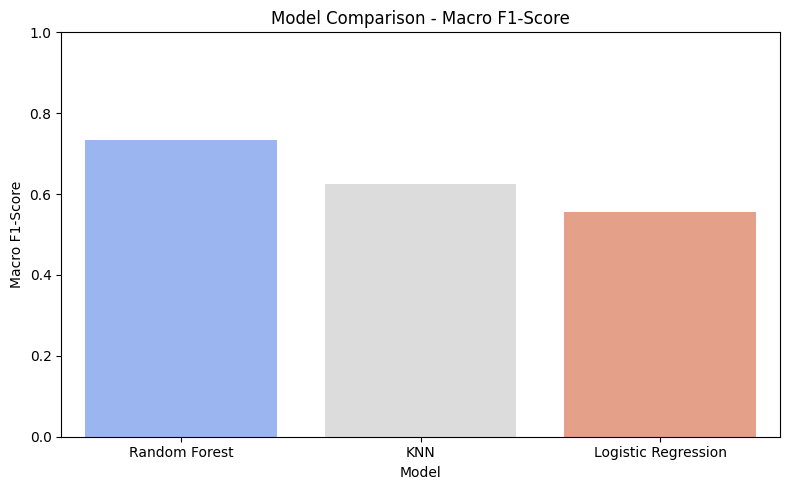

In [78]:
# ========================== #
# 8. MACRO F1-SCORE EVALUATION
# ========================== #
from sklearn.metrics import f1_score

rf_f1_macro = f1_score(y_test, rf_pred, average='macro')
lr_f1_macro = f1_score(y_test, lr_pred, average='macro')
knn_f1_macro = f1_score(y_test, knn_pred, average='macro')

print("=== Macro F1-Score ===")
print("Random Forest:", rf_f1_macro)
print("Logistic Regression:", lr_f1_macro)
print("K-Nearest Neighbors:", knn_f1_macro)

# Visualisasi sebagai barplot
f1_results = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'KNN'],
    'Macro F1-Score': [rf_f1_macro, lr_f1_macro, knn_f1_macro]
}).sort_values(by='Macro F1-Score', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=f1_results, x='Model', y='Macro F1-Score', palette='coolwarm')
plt.title("Model Comparison - Macro F1-Score")
plt.ylim(0.0, 1.0)
plt.tight_layout()
plt.show()

# F1-Score digunakan buat mengukur keseimbangan antara presisi dan recall pada prediksi model--jadi misal stress sama not stress nya gaseimbang
# Dari evaluasi F1 (yang adil ke semua kelas), Random Forest adalah model terbaik buat klasifikasi stres.
